In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
np.random.seed(72)

In [4]:
full_df = pd.read_csv('/content/drive/MyDrive/DS Mentorship/NFL.csv')
full_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [6]:
full_df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.961115,0.325123,0.231411,0.321701,0.227694,0.276472,-0.014728,-0.011518,-0.018683,2011.000000
50%,2.013111e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531274,0.469052,0.533609,0.466670,0.504470,0.000000,0.003441,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.485508,0.769232,0.675530,0.772882,0.678833,0.725477,0.014684,0.035792,0.011431,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [7]:
# Checking if any missing value
pd.isnull(full_df).sum()

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

In [8]:
# There are lot of missing values in some columns , So we handle them

In [9]:
!pip install pandas_profiling==3.1.0

In [10]:
from pandas_profiling import ProfileReport

In [11]:
# ProfileReport(full_df)

In [12]:
# Check percentage of missing data
missing_values = full_df.isnull().sum().sum()
total_cell = np.product(full_df.shape)

missing_percentage = (missing_values / total_cell) * 100
print(missing_percentage)

24.87214126835169


In [13]:
# 24% of data is missing , Seems natural as in real life data set we can expect 30% missing values

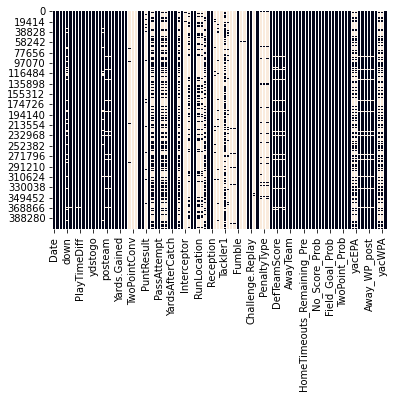

In [14]:
%matplotlib inline
plt.figure()
sns.heatmap(full_df.isnull(), cbar=False)
plt.show()

In [15]:
# every row in our dataset had at least one missing value , So can't just drop NA rows

In [16]:
# If can't delete rows , will try to delete all columns with at least one missing value
columns_dropped_df = full_df.dropna(axis = 1)
columns_dropped_df.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [17]:
# Now data has 41 columns , Let us check NA values again

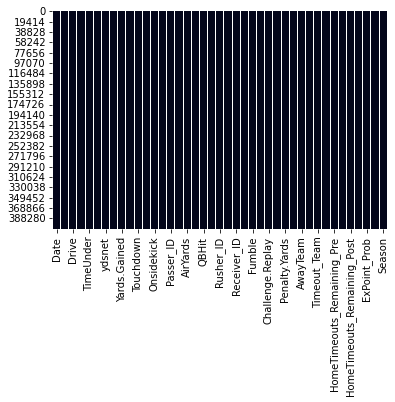

In [18]:
%matplotlib inline
plt.figure()
sns.heatmap(columns_dropped_df.isnull(), cbar=False)
plt.show()

In [19]:
# But with dropna method we are deleting all columns with one NA value , We may use that data for other purposes also , So trying other imputation methods

In [20]:
# Filling NA with 0
fill_df = full_df.fillna(0)
fill_df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [21]:
# It is not just 0 , We can fill in each column with a number that is most approproate statistically

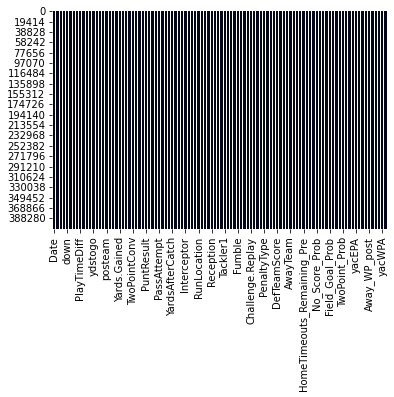

In [22]:
%matplotlib inline
plt.figure()
sns.heatmap(fill_df.isnull(), cbar=False)
plt.show()

In [23]:
# Taking Subset of data and implementing bfill , ffill and interpolate methods

In [24]:
subset_df = full_df.head(1000)

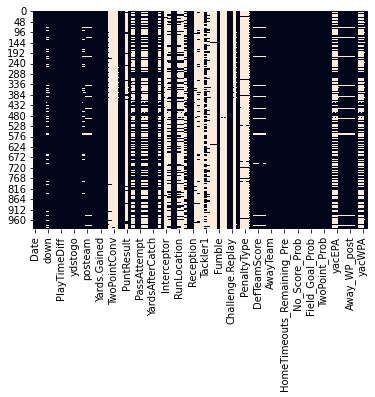

In [25]:
%matplotlib inline
plt.figure()
sns.heatmap(subset_df.isnull(), cbar=False)
plt.show()

In [26]:
# Forward filling
ffill_df = subset_df.ffill(axis = 1)
ffill_df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,1,15:00,15,3600.0,0.0,TEN,...,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.060758,0.060758,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-1.40276,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,-0.040295,-0.040295,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.097712,0.097712,2009


In [27]:
# Backward filling
bfill_df = subset_df.bfill(axis = 1)
bfill_df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,15:00,15:00,15,3600.0,0.0,TEN,...,0.485675,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009,2009,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.551088,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009,2009,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.461217,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009,2009,2009


In [28]:
# Interpolate
interpolate_df = subset_df.interpolate(method = 'linear' , limit_direction ='forward')
interpolate_df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-1.942674,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.037209,-0.059670,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,-3.299638,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.067623,-0.102149,2009


In [29]:
# Implementing ML on interpolate_df

In [30]:
df = pd.get_dummies(interpolate_df)
df.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,Timeout_Team_HOU,Timeout_Team_IND,Timeout_Team_JAC,Timeout_Team_MIN,Timeout_Team_NO,Timeout_Team_NYJ,Timeout_Team_None,Timeout_Team_PIT,Timeout_Team_TB,Timeout_Team_TEN
0,2009091000,1,1,NaN,15,3600.0,0.0,30.0,30.0,0,...,0,0,0,0,0,0,1,0,0,0
1,2009091000,1,1,1.0,15,3593.0,7.0,42.0,58.0,10,...,0,0,0,0,0,0,1,0,0,0
2,2009091000,1,1,2.0,15,3556.0,37.0,47.0,53.0,5,...,0,0,0,0,0,0,1,0,0,0
3,2009091000,1,1,3.0,14,3515.0,41.0,44.0,56.0,8,...,0,0,0,0,0,0,1,0,0,0
4,2009091000,1,1,4.0,14,3507.0,8.0,44.0,56.0,8,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df = df.dropna()

In [32]:
X = df.drop('Touchdown' , axis = 1)
X.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,Timeout_Team_HOU,Timeout_Team_IND,Timeout_Team_JAC,Timeout_Team_MIN,Timeout_Team_NO,Timeout_Team_NYJ,Timeout_Team_None,Timeout_Team_PIT,Timeout_Team_TB,Timeout_Team_TEN
20,2009091000,4,1,4.0,7,3108.0,4.0,19.0,19.0,7,...,0,0,0,0,0,0,1,0,0,0
21,2009091000,5,1,1.0,7,3104.0,4.0,27.0,73.0,10,...,0,0,0,0,0,0,1,0,0,0
22,2009091000,5,1,2.0,7,3069.0,35.0,28.0,72.0,9,...,0,0,0,0,0,0,1,0,0,0
23,2009091000,5,1,3.0,6,3027.0,42.0,30.0,70.0,7,...,0,0,0,0,0,0,1,0,0,0
24,2009091000,5,1,4.0,6,3002.0,25.0,21.0,79.0,16,...,0,0,0,0,0,0,1,0,0,0


In [33]:
y = df.Touchdown
y.head()

20    0
21    0
22    0
23    0
24    0
Name: Touchdown, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
# Splitting into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

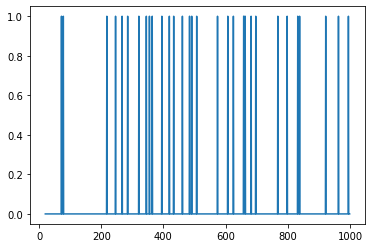

In [35]:
plt.plot(df.Touchdown)

In [36]:
# Touchdown is either 0 or 1 , So it is a classification problem

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [38]:
model.fit(X_train , y_train)

RandomForestClassifier()

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.15713484026367722

# RMSE Value is 0.15

In [41]:
# Saving Classical ML Model
from joblib import dump
dump(model , 'TouchDownPredictionModel.joblib')

['TouchDownPredictionModel.joblib']

In [42]:
!ls

drive  sample_data  TouchDownPredictionModel.joblib
